<a href="https://colab.research.google.com/github/rajeevrpandey/MNIST-Digits-Classification/blob/main/MNIST_digits_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import sys

assert sys.version_info >= (3, 7)

In [2]:
from packaging import version
import sklearn

assert version.parse(sklearn.__version__) >= version.parse("1.0.1")

In [3]:
# plt.rc defines a runtime configuration (rc) containing the default styles for every plot element you create
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

In [4]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', as_frame=False)
# as_frame=False: This parameter indicates
# whether to return the data as a pandas DataFrame (if as_frame=True) or as a NumPy array (if as_frame=False)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [5]:
print(mnist.DESCR)

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

In [6]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [7]:
print(type(mnist))

<class 'sklearn.utils._bunch.Bunch'>


In [8]:
X, y = mnist.data, mnist.target
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [9]:
X.shape # each row contains (28 * 28) values, i.e., for each pixel

(70000, 784)

In [10]:
y

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [11]:
y.shape

(70000,)

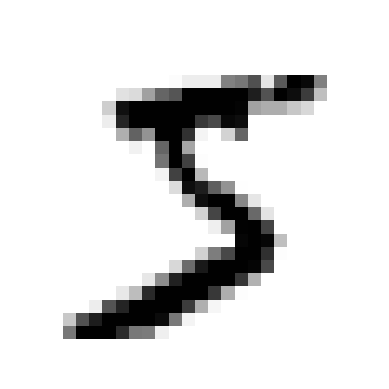

In [12]:
import matplotlib.pyplot as plt

def plot_digit(image_data):
    image = image_data.reshape(28, 28) #  image_data array is reshaped into a 2D array with dimensions of 28x28
    plt.imshow(image, cmap="binary") # plt.imshow function is used to display the reshaped 2D image.
    # Also, The cmap="binary" parameter specifies that the colormap used for
    # rendering the image should consist of only black and white colors, with no
    # intermediate shades of gray.
    plt.axis("off")
    # The plt.axis("off") call is used to turn off the axis markings and labels in
    # the plot, resulting in a clean display of the digit image without any axis
    # ticks or labels.

some_digit = X[0] # 1D array containing pixel values of 1st digit
plot_digit(some_digit)
plt.show()

In [13]:
y[0] # actual target value of first digit

'5'

In [14]:
# 10000 for testing
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [15]:
## Training a Binary Classifier

In [16]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train)

SGDClassifier(random_state=42)

In [17]:
sgd_clf.predict([some_digit]) # actual target is '5'

array(['3'], dtype='<U1')

In [18]:
sgd_clf.decision_function([some_digit]).round()

# The decision_function method is called on the SGDClassifier instance (sgd_clf)
# with [some_digit] as the input. This method computes the decision scores for
# the given input sample. The decision scores represent the signed distance of
# the sample from the decision boundary for each class.


array([[-31893., -34420.,  -9531.,   1824., -22320.,  -1386., -26189.,
        -16148.,  -4604., -12051.]])

In [19]:
from sklearn.model_selection import cross_val_predict, cross_val_score

cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy") # 3 fold cross-validation

array([0.87365, 0.85835, 0.8689 ])

In [20]:
from sklearn.preprocessing import StandardScaler
# scalling improves the performance SGD classifier
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype("float64"))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

array([0.8983, 0.891 , 0.9018])

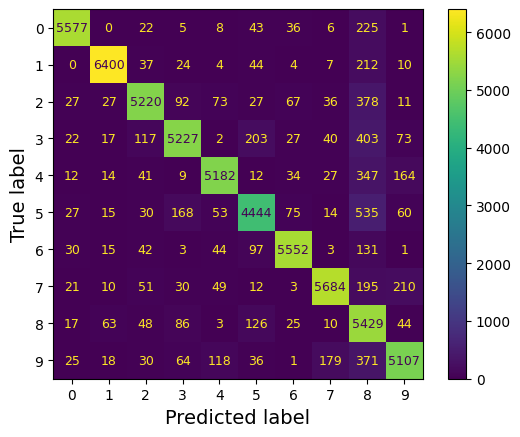

In [21]:
## Error analysis

from sklearn.metrics import ConfusionMatrixDisplay

y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
plt.rc('font', size=9)  # extra code – make the text smaller
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred) # construct a confusion matrix
plt.show()

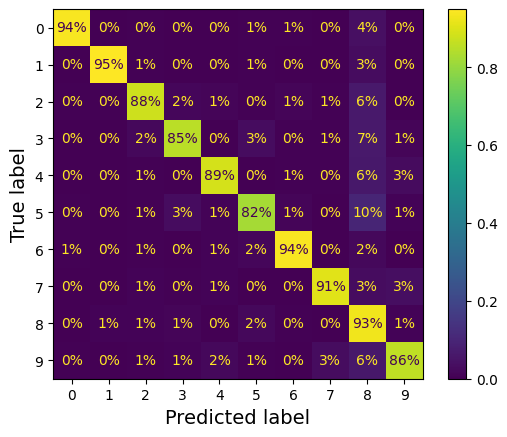

In [22]:
plt.rc('font', size=10)  # extra code
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred,
                                        normalize="true", values_format=".0%")
# The additional parameters normalize="true" and values_format=".0%" are used
# to create a normalized confusion matrix where each cell's value represents the
# percentage of true samples in that class among all samples in the true class
plt.show()

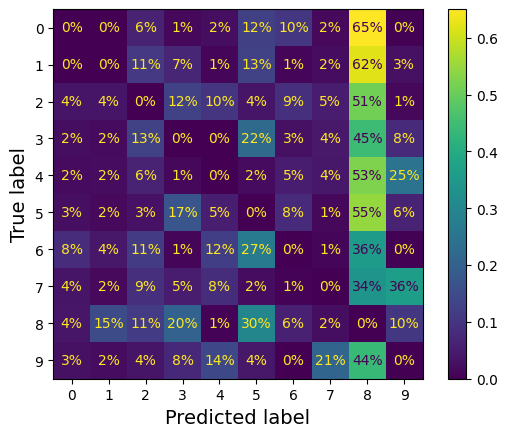

In [23]:
sample_weight = (y_train_pred != y_train) # gives true for all misclassifications
plt.rc('font', size=10)  # extra code
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred,
                                        sample_weight=sample_weight,
                                        normalize="true", values_format=".0%")
# the sample_weight parameter is provided to incorporate the computed sample
# weights, which can help emphasize misclassifications and their impact on the
# visualization.This can provide valuable insights into areas where the
# classifier may be struggling.
plt.show()

In [24]:
# the KNeighborsClassifier works quite well for this task; you just need to find
# good hyperparameter values (try a grid search on the weights and n_neighbors
# hyperparameters).

import numpy as np
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)
baseline_accuracy = knn_clf.score(X_test, y_test)
baseline_accuracy

0.9688

In [25]:
# Great! A regular KNN classifier with the default hyperparameters is already very close to our goal.

# Let's see if tuning the hyperparameters can help. To speed up the search, let's train only on the first 10,000 images:

from sklearn.model_selection import GridSearchCV

param_grid = [{'weights': ["uniform", "distance"], 'n_neighbors': [3, 4, 5, 6]}]

knn_clf = KNeighborsClassifier()
grid_search = GridSearchCV(knn_clf, param_grid, cv=5)
grid_search.fit(X_train[:10_000], y_train[:10_000])

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': [3, 4, 5, 6],
                          'weights': ['uniform', 'distance']}])

In [26]:
grid_search.best_params_

{'n_neighbors': 4, 'weights': 'distance'}

In [27]:
grid_search.best_score_

0.9441999999999998

In [28]:
# let's take the best model and train it again on the full training set:

In [29]:
grid_search.best_estimator_.fit(X_train, y_train)
tuned_accuracy = grid_search.score(X_test, y_test)
tuned_accuracy

0.9714